In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [28]:
trainxy = pd.read_csv('/home/kshitij/Acads/MS4610 project/IDA project dataset/train_xy.csv')
trainx  = pd.read_csv('/home/kshitij/Acads/MS4610 project/IDA project dataset/train_x.csv')
trainy  = pd.read_csv('/home/kshitij/Acads/MS4610 project/IDA project dataset/train_y.csv')
testx   = pd.read_csv('/home/kshitij/Acads/MS4610 project/IDA project dataset/test_x.csv')
trainxy.drop(['ID'],axis=1,inplace=True)
trainx.drop(['ID'],axis=1,inplace=True)
trainy.drop(['ID'],axis=1,inplace=True)
testx_model=testx.copy()
testx_model.drop(['ID_Test'],axis=1,inplace=True)

<Figure size 1080x1080 with 0 Axes>

,Expense,Income,Loan type,Age,Score1,Score2,Score3,Score4,Score5,Label,Occupation_X,Occupation_Y,Occupation_Z
0,1830.943788,14767.28013,1.0,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291,0.0,0,1,0
1,1645.302546,15272.26775,1.0,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455,0.0,0,1,0
2,1555.026392,17482.49734,0.0,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886,0.0,0,1,0
3,NaN,16257.66493,0.0,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849,0.0,0,1,0
4,1777.648916,16316.29914,1.0,1.0,NaN,224.074728,11.218489,605.947340,3438.864083,0.0,1,0,0


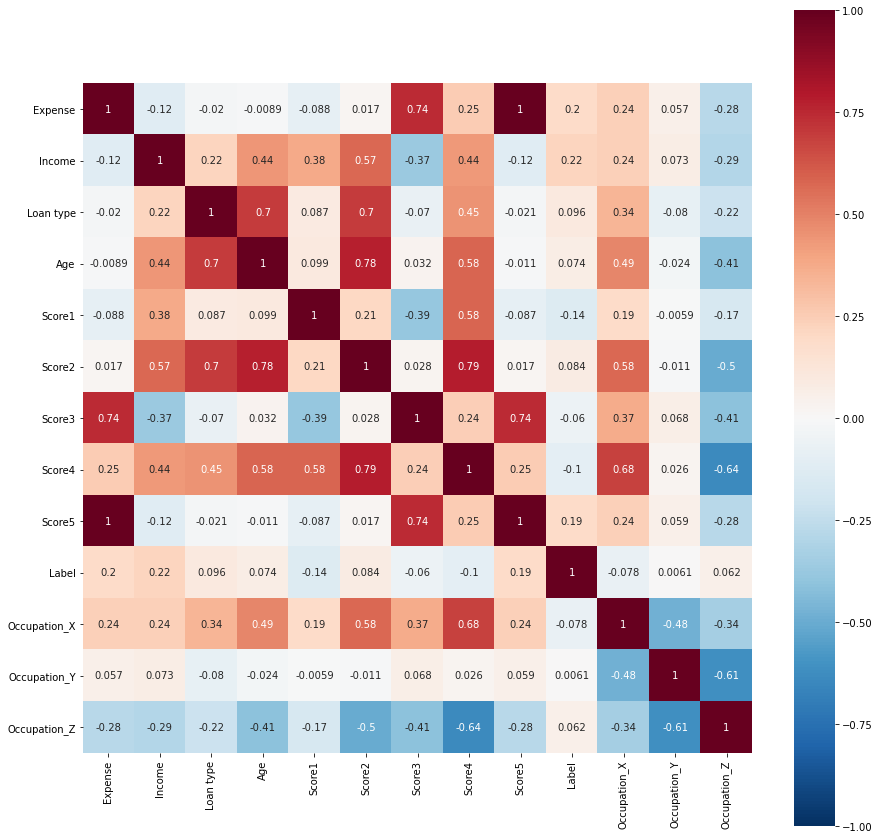

In [3]:
plt.figure(figsize=(15, 15))
trainxycopy=trainxy.copy()
trainxycopy["Loan type"] = trainxycopy["Loan type"].astype('category')
trainxycopy["Loan type"] = trainxycopy["Loan type"].cat.codes
trainxycopy.loc[(trainxycopy['Loan type']==-1),'Loan type']=np.NaN
trainxycopy=pd.get_dummies(trainxycopy, columns=["Occupation type"], prefix=["Occupation"])
trainxycopy.head()
sns.heatmap(trainxycopy.corr(), square=True, annot=True, cmap='RdBu_r', vmin=-1.0, vmax=1.0)

Text(0.5, 1.0, 'Score2 by Occupation')

Text(0.5, 1.0, 'Score2 by Loan')

Text(0.5, 1.0, 'Score2 by Age')

Text(0.5, 1.0, 'Score2 by Label')

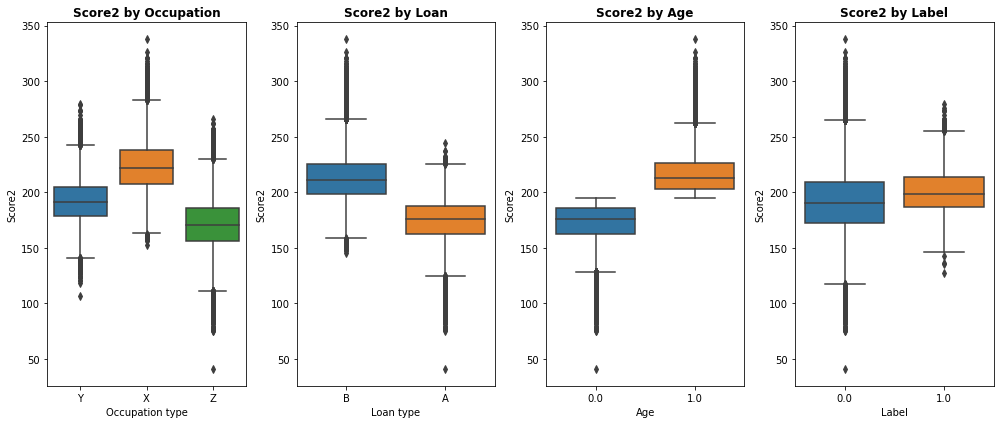

In [4]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(141)
sns.boxplot(y='Score2', x='Occupation type', data=trainxy)
ax1.set_title('Score2 by Occupation', fontweight='bold')
ax2 = fig.add_subplot(142)
sns.boxplot(y='Score2', x='Loan type', data=trainxy)
ax2.set_title('Score2 by Loan', fontweight='bold')
plt.tight_layout()
ax3 = fig.add_subplot(143)
sns.boxplot(y='Score2', x='Age', data=trainxy)
ax3.set_title('Score2 by Age', fontweight='bold')
plt.tight_layout()
ax4 = fig.add_subplot(144)
sns.boxplot(y='Score2', x='Label', data=trainxy)
ax4.set_title('Score2 by Label', fontweight='bold')
plt.tight_layout()

In [5]:
trainxy.loc[(trainxy.Age.isna())&(trainxy.Score2>=194.9185),'Age']=1
trainxy.loc[(trainxy.Age.isna())&(trainxy.Score2<194.9185),'Age']=0

In [6]:
trainxy.loc[trainxy['Loan type']=='A'].Score2.quantile([0.155,0.5,0.845])
trainxy.loc[trainxy['Loan type']=='B'].Score2.quantile([0.155,0.5,0.845])

0.155    154.306460
0.500    175.556725
0.845    192.266763
Name: Score2, dtype: float64

0.155    192.683143
0.500    210.758915
0.845    234.417230
Name: Score2, dtype: float64

Text(0.5, 1.0, 'Score2 by Occupation')

Text(0.5, 1.0, 'Score2 by Loan type')

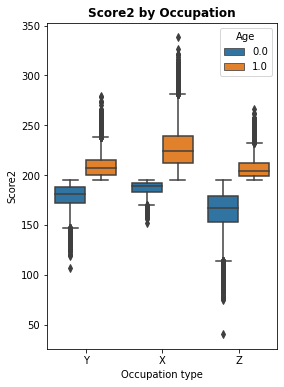

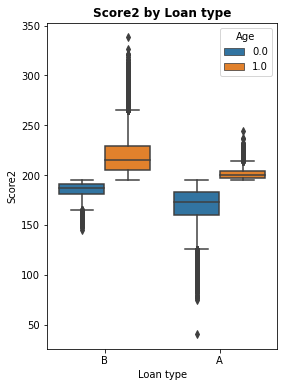

In [7]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(131)
sns.boxplot(y='Score2', x='Occupation type', hue='Age', data=trainxy)
ax1.set_title('Score2 by Occupation', fontweight='bold')
fig = plt.figure(figsize=(14, 6))
ax2 = fig.add_subplot(132)
sns.boxplot(y='Score2', x='Loan type', hue='Age', data=trainxy)
ax2.set_title('Score2 by Loan type', fontweight='bold')

In [8]:
trainxy["Loan type"] = trainxy["Loan type"].astype('category')
trainxy["Loan type"] = trainxy["Loan type"].cat.codes
trainxy.loc[(trainxy['Loan type']==-1),'Loan type']=np.NaN
trainxy.loc[(trainxy.Score2.notna())&(trainxy['Loan type'].isna())&(192.47<trainxy.Score2),'Loan type']=1
trainxy.loc[(trainxy.Score2.notna())&(trainxy['Loan type'].isna())&(192.47>trainxy.Score2),'Loan type']=0

Text(0.5, 1.0, 'Score4 by Occupation')

Text(0.5, 1.0, 'Score4 by Loan')

Text(0.5, 1.0, 'Score4 by Age')

Text(0.5, 1.0, 'Score4 by Label')

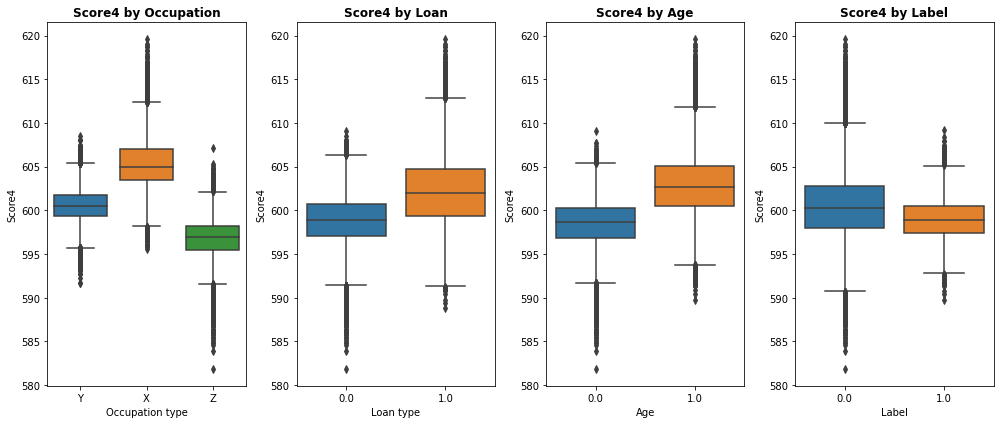

In [9]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(141)
sns.boxplot(y='Score4', x='Occupation type', data=trainxy)
ax1.set_title('Score4 by Occupation', fontweight='bold')
ax2 = fig.add_subplot(142)
sns.boxplot(y='Score4', x='Loan type', data=trainxy)
ax2.set_title('Score4 by Loan', fontweight='bold')
plt.tight_layout()
ax3 = fig.add_subplot(143)
sns.boxplot(y='Score4', x='Age', data=trainxy)
ax3.set_title('Score4 by Age', fontweight='bold')
plt.tight_layout()
ax4 = fig.add_subplot(144)
sns.boxplot(y='Score4', x='Label', data=trainxy)
ax4.set_title('Score4 by Label', fontweight='bold')
plt.tight_layout()

In [10]:
trainxy=pd.get_dummies(trainxy, columns=["Occupation type"], prefix=["Occupation"])
trainxy.loc[trainxy.Occupation_X==1].Score4.quantile([0.15,0.5,0.85])
trainxy.loc[trainxy.Occupation_Y==1].Score4.quantile([0.15,0.5,0.85])
trainxy.loc[trainxy.Occupation_Z==1].Score4.quantile([0.15,0.5,0.85])

0.15    602.803914
0.50    605.014373
0.85    608.381342
Name: Score4, dtype: float64

0.15    598.703477
0.50    600.497287
0.85    602.400650
Name: Score4, dtype: float64

0.15    594.570489
0.50    596.988093
0.85    598.691516
Name: Score4, dtype: float64

In [11]:
trainxy.loc[(trainxy.Score4.notna())&(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==0)&(602.81<trainxy.Score4),'Occupation_X']=1
trainxy.loc[(trainxy.Score4.notna())&(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==0)&(598.71<trainxy.Score4)&(trainxy.Score4<602.38),'Occupation_Y']=1
trainxy.loc[(trainxy.Score4.notna())&(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==0)&(trainxy.Score4<598.67),'Occupation_Z']=1

In [12]:
trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_X==1),'Score4']=trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_X==1)].Score4.median()
trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_Y==1),'Score4']=trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_Y==1)].Score4.median()
trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_Z==1),'Score4']=trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_Z==1)].Score4.median()

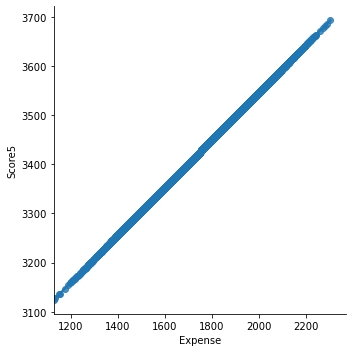

In [13]:
sns.lmplot(x='Expense', y='Score5', data=trainxy)

(array([3100., 3200., 3300., 3400., 3500., 3600., 3700.]),
 <a list of 7 Text major ticklabel objects>)

(array([1000., 1200., 1400., 1600., 1800., 2000., 2200., 2400.]),
 <a list of 8 Text major ticklabel objects>)

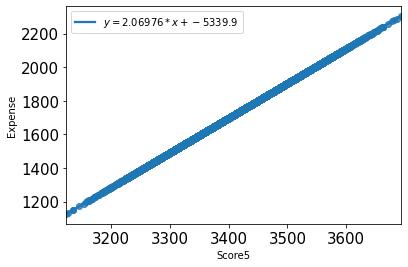

In [14]:
trainxyfill=trainxy.copy()
trainxyfill.dropna(subset = ["Expense"], inplace=True)
trainxyfill.dropna(subset = ["Score5"], inplace=True)
slope, intercept, r_value, pv, se = scs.linregress(trainxyfill['Score5'], trainxyfill['Expense'])
sns.regplot(trainxyfill['Score5'], trainxyfill['Expense'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)

In [15]:
trainxy.loc[(trainxy.Expense.isna())&(trainxy.Score5.notna()),'Expense']=trainxy.Score5*2.06976-5339.9
trainxy.loc[(trainxy.Expense.notna())&(trainxy.Score5.isna()),'Score5']=(trainxy.Expense+5339.9)/2.06976

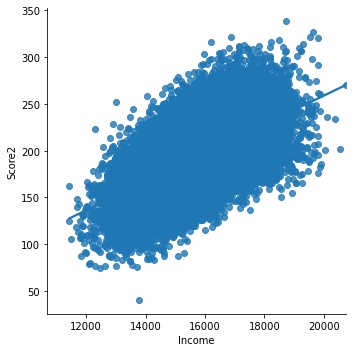

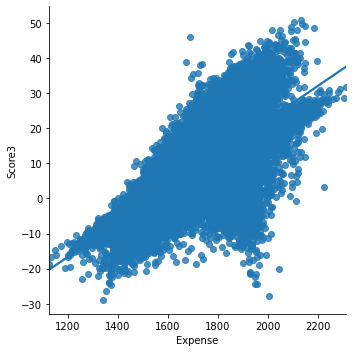

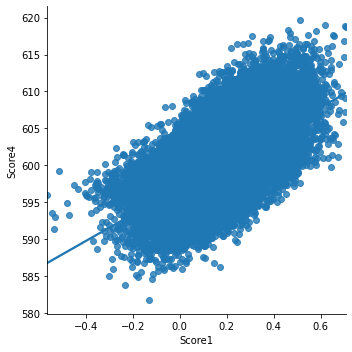

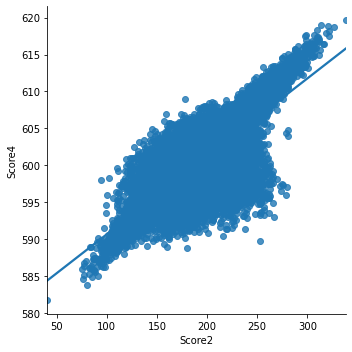

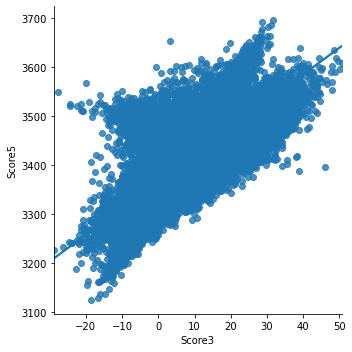

In [16]:
sns.lmplot(x='Income', y='Score2', data=trainxy)   

sns.lmplot(x='Expense', y='Score3', data=trainxy)  

sns.lmplot(x='Score1', y='Score4', data=trainxy)   

sns.lmplot(x='Score2', y='Score4', data=trainxy)   

sns.lmplot(x='Score3', y='Score5', data=trainxy)   

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

(array([575., 580., 585., 590., 595., 600., 605., 610., 615., 620., 625.]),
 <a list of 11 Text major ticklabel objects>)

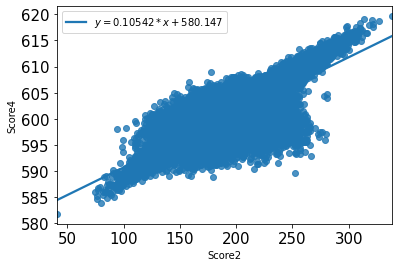

In [17]:
trainxyfill=trainxy.copy()
trainxyfill.dropna(subset = ["Score2"], inplace=True)
trainxyfill.dropna(subset = ["Score4"], inplace=True)
slope, intercept, r_value, pv, se = scs.linregress(trainxyfill['Score2'], trainxyfill['Score4'])
sns.regplot(trainxyfill['Score2'], trainxyfill['Score4'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)

In [18]:
trainxy.loc[(trainxy.Expense.isna())&(trainxy.Score5.notna()),'Expense']=trainxy.Score5*2.06976-5339.9
trainxy.loc[(trainxy.Expense.notna())&(trainxy.Score5.isna()),'Score5']=(trainxy.Expense+5339.9)/2.06976

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

(array([10000., 12000., 14000., 16000., 18000., 20000., 22000.]),
 <a list of 7 Text major ticklabel objects>)

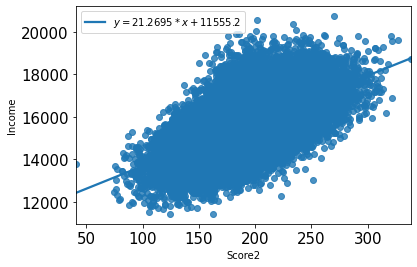

In [19]:
trainxyfill=trainxy.copy()
trainxyfill.dropna(subset = ["Score2"], inplace=True)
trainxyfill.dropna(subset = ["Income"], inplace=True)
slope, intercept, r_value, pv, se = scs.linregress(trainxyfill['Score2'], trainxyfill['Income'])
sns.regplot(trainxyfill['Score2'], trainxyfill['Income'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)

In [20]:
trainxy.loc[(trainxy.Income.isna())&(trainxy.Score2.notna()),'Income']=trainxy.Score2*20.9689+11613.7
trainxy.loc[(trainxy.Income.notna())&(trainxy.Score2.isna()),'Score2']=(trainxy.Income-11613.7)/20.9689

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 <a list of 8 Text major ticklabel objects>)

(array([575., 580., 585., 590., 595., 600., 605., 610., 615., 620., 625.]),
 <a list of 11 Text major ticklabel objects>)

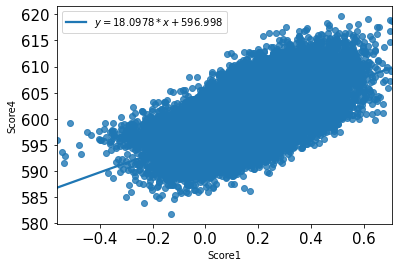

In [21]:
trainxyfill=trainxy.copy()
trainxyfill.dropna(subset = ["Score1"], inplace=True)
trainxyfill.dropna(subset = ["Score4"], inplace=True)
slope, intercept, r_value, pv, se = scs.linregress(trainxyfill['Score1'], trainxyfill['Score4'])
sns.regplot(trainxyfill['Score1'], trainxyfill['Score4'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)

In [22]:
trainxy.loc[(trainxy.Score4.isna())&(trainxy.Score1.notna()),'Score4']=trainxy.Score1*17.7343+597.066
trainxy.loc[(trainxy.Score4.notna())&(trainxy.Score1.isna()),'Score1']=(trainxy.Score4-597.066)/17.7343

(array([-30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 10 Text major ticklabel objects>)

(array([1000., 1200., 1400., 1600., 1800., 2000., 2200., 2400.]),
 <a list of 8 Text major ticklabel objects>)

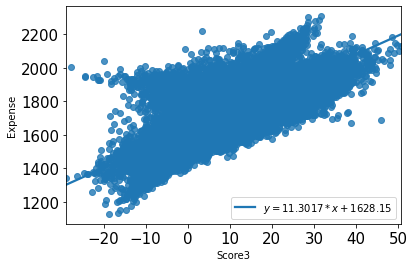

In [23]:
trainxyfill=trainxy.copy()
trainxyfill.dropna(subset = ["Expense"], inplace=True)
trainxyfill.dropna(subset = ["Score3"], inplace=True)
slope, intercept, r_value, pv, se = scs.linregress(trainxyfill['Score3'], trainxyfill['Expense'])
sns.regplot(trainxyfill['Score3'], trainxyfill['Expense'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)

In [24]:
trainxy.loc[(trainxy.Expense.isna())&(trainxy.Score3.notna()),'Expense']=trainxy.Score3*11.3017+1628.15
trainxy.loc[(trainxy.Expense.notna())&(trainxy.Score3.isna()),'Score3']=(trainxy.Expense-1628.15)/11.3017

In [25]:
trainxy.isnull().sum()

Expense            1
Income            52
Loan type         53
Age               45
Score1            45
Score2            52
Score3             1
Score4            45
Score5            63
Label           3903
Occupation_X       0
Occupation_Y       0
Occupation_Z       0
dtype: int64

In [26]:
trainxy.loc[(trainxy.Occupation_X==1)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==0)].loc[trainxy.Age==1].shape
trainxy.loc[(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==1)&(trainxy.Occupation_Z==0)].loc[trainxy.Age==1].shape
trainxy.loc[(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==1)].loc[trainxy.Age==1].shape
trainxy.loc[(trainxy.Occupation_X==1)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==0)].loc[trainxy.Age==0].shape
trainxy.loc[(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==1)&(trainxy.Occupation_Z==0)].loc[trainxy.Age==0].shape
trainxy.loc[(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==1)].loc[trainxy.Age==0].shape

(15881, 13)

(16029, 13)

(3319, 13)

(1581, 13)

(21502, 13)

(21523, 13)

In [27]:
trainxy.loc[(trainxy['Loan type']==0)].loc[trainxy.Age==0].shape
trainxy.loc[(trainxy['Loan type']==1)].loc[trainxy.Age==0].shape
trainxy.loc[(trainxy['Loan type']==0)].loc[trainxy.Age==1].shape
trainxy.loc[(trainxy['Loan type']==1)].loc[trainxy.Age==1].shape


(37707, 13)

(6925, 13)

(4696, 13)

(30575, 13)

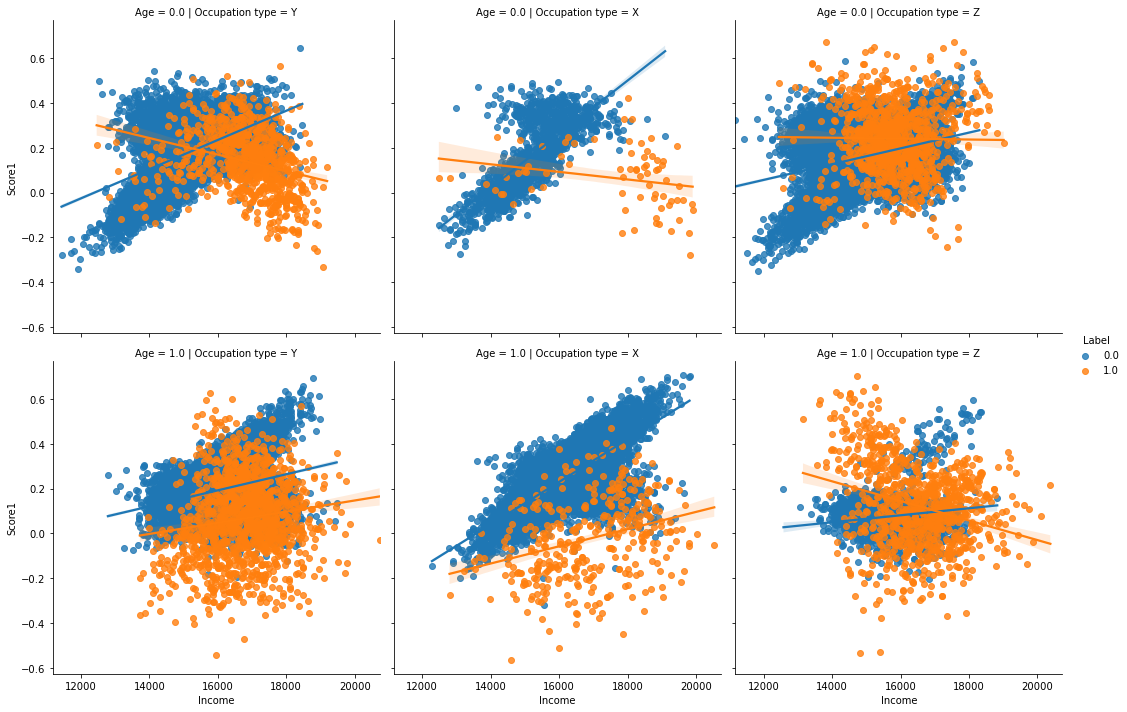

In [29]:
sns.lmplot(x='Income', y='Score1', hue='Label', col='Occupation type', row='Age', data=trainxy)